## Decision trees and random forests

For a writeup on decision trees, see: https://developers.google.com/machine-learning/decision-forests/decision-trees

Decision trees follow a flowchart-like structure with nodes for features and a branch for a decision/rule, where leaves from the nodes represent outcomes. 

The process for making decision tree algorithms:

- Select attributes to split records
- Use the attribute as a decision node to break data into smaller subsets
- Keep building trees until: all tuples belong to the same attribute value, there are no more remaining attributes, there are no more instances We need to use Attribute Selection Measures (ASM) to help split attributes, they provide a score to tell us how well our splits work.

In [23]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

# Using the col names argument I can specify what the column names of the CSV I'm reading in 
# should be. Not necessary here but useful to know.
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv', names=col_names, skiprows=1)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
# Instead of cleaning out zero values, we'll use simple imputation to replace values of zero
# in columns where there shouldn't be zeros with the mean value.
imp = SimpleImputer(strategy='mean')

empty_data_cols = ['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

# The imputation won't work with 0s as it thinks they're real values,
# so we'll replace them with NAs.
df[empty_data_cols] = df[empty_data_cols].replace(0, np.nan)

for col in empty_data_cols:
    df[col] = imp.fit_transform(df[col].values.reshape(-1, 1))
    

df['insulin']

0      155.548223
1      155.548223
2      155.548223
3       94.000000
4      168.000000
          ...    
763    180.000000
764    155.548223
765    112.000000
766    155.548223
767    155.548223
Name: insulin, Length: 768, dtype: float64

In [36]:
# As always, let's select our X (independent) and y (dependent) variables
# Using the [] slicing notation we can take all but the last column as a list, and then
# use that to select our df columns
feature_cols = col_names[:-1]
X = df[feature_cols]
y = df['label']

X

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0


In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Accuracy: 0.7402597402597403


Text(0.5, 1.0, 'Confusion matrix')

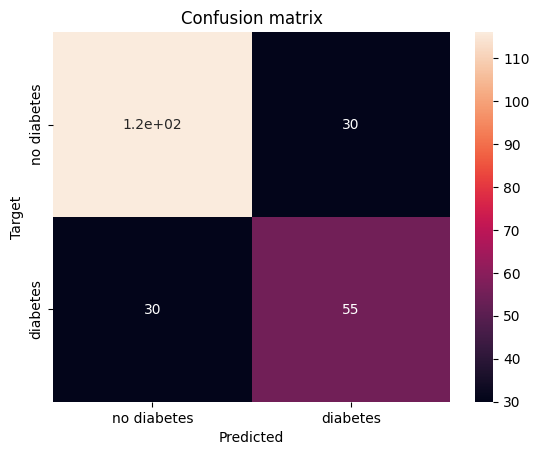

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['no diabetes', 'diabetes'], 
            yticklabels=['no diabetes', 'diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

#1.2e+02 is 120 in scientific notation

As we can see, we are pretty good at predicting no diabetes, and better than a coin flip at predicting diabetes, but maybe we'd be better off over predicting diabetes in a practical sense?

1. Precision: Percentage of correct positive predictions relative to total positive predictions.
So for diabetes this is 55/85*100 ~64%
For not diabetes this is 120 / 150 * 100  ~ 80%

2. Recall: Percentage of correct positive predictions relative to total actual positives.
So for diabetes this is 55/85*100 ~64%
For not diabetes this is 120 / 150 * 100  ~ 80%

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

In [30]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print(output_report)
print(output_report['accuracy'])

{'without diabetes': {'precision': 0.7945205479452054, 'recall': 0.7945205479452054, 'f1-score': 0.7945205479452054, 'support': 146.0}, 'with diabetes': {'precision': 0.6470588235294118, 'recall': 0.6470588235294118, 'f1-score': 0.6470588235294118, 'support': 85.0}, 'accuracy': 0.7402597402597403, 'macro avg': {'precision': 0.7207896857373086, 'recall': 0.7207896857373086, 'f1-score': 0.7207896857373086, 'support': 231.0}, 'weighted avg': {'precision': 0.7402597402597403, 'recall': 0.7402597402597403, 'f1-score': 0.7402597402597403, 'support': 231.0}}
0.7402597402597403


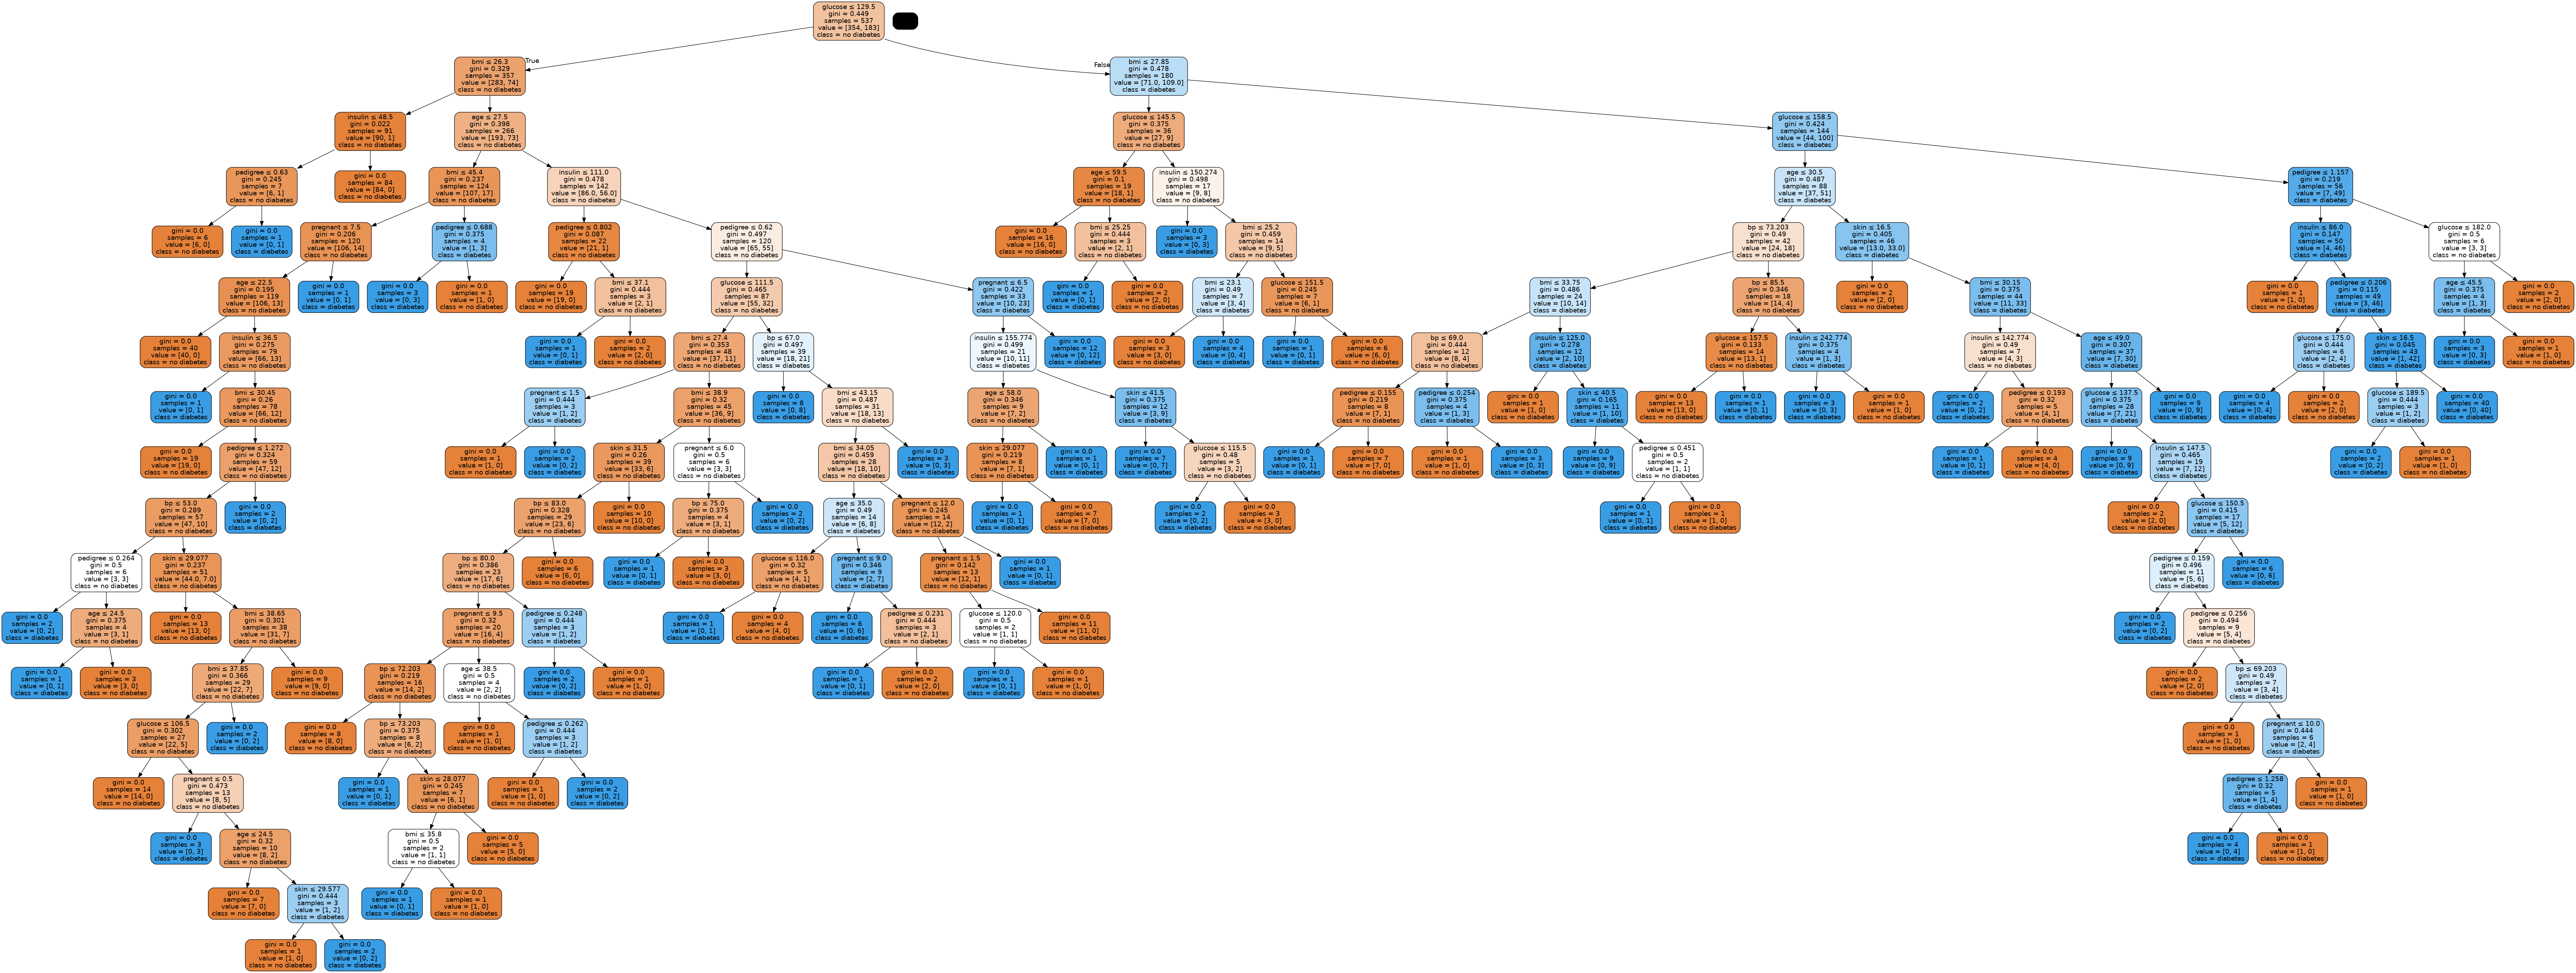

In [37]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['no diabetes','diabetes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This is the initial tree generated by our ML algorithm. The gini number is how 'pure' the node is, that is, if all its records belong to the same class (such as is the case for leaf nodes). So if it has a gini of 0, all values are of the same type (eg no diabetes). The default for the sklearn decision tree algorythm is to use gini as a splitting factor, as in, it will split each node on which values produces the greatest change in gini, as in, which splitting value puts the highest proportion of each type of outcome on either side of the split. Ideally, it'd find a split to put all diabetes one side, and all non-diabetes the other, but it does its best to make the diabetes:non-diabetes, and non-diabetes:diabetes ratios the biggest it can.

This plot is pretty uninteligible though, so we are going to do some work to make it make sense.

To improve tree performance we can use three arguments: criterion, splitter, and max_depth. These, retrospectively: let us choose attribute measuers (gini as standard, also possible are gain ratio and information gain (google these to understand them)), choose the split strategy (between best split and random split), and the maximum depth of the tree (which can fix over/underfitting).

Let's prune the tree by redoing the calculations, but with different arguments:

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


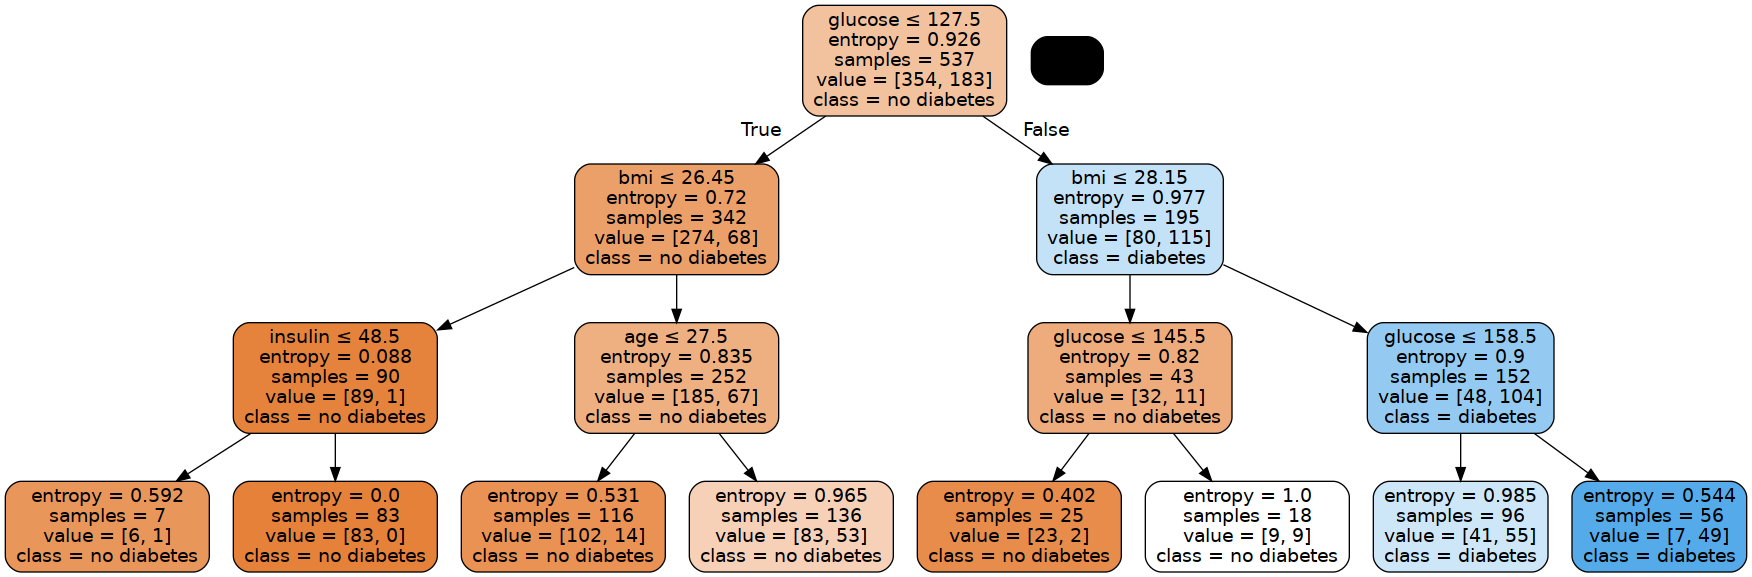

In [39]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['no diabetes','diabetes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

From this tree we can see that, according to the model, glucose over 127.5 predicts diabetes, further, in groups with glucose over 127.5, having a BMI of over 28.15 and a glucose of over 158.5 predicts diabetes, but a BMI over 28.15 and a glucose under 145.5 does not.

First off: the saturation of the colours of a node is an indication of higher predicted target values, of the samples in a node, what proportion of them end up being the outcome indicated by the node (so, if the node predicts no diabetes and 93 of the samples in that node do not have diabetes, and 3 do, it’ll be a saturated orange indicating, essentially, that most of the samples in that cell are in agreement with the prediction of the cell).

There were also two ways we looked at for what the model should prioritise in making the decision tree: minimising gini index, or maximising information gain, which then got confusing as when we chose to maximise information gain, the measure we got was entropy.

First, gini index is essentially a way of measuring, when we use a node to split data somewhere, how good that value we chose to split at (say glucose <= 127.5) is at separating samples into diabetes and non-diabetes categories. It’s trying to maximise non-diabetes on one side of the split and diabetes on the other, whilst minimising diabetes on the first side of the split, and non-diabetes on the other. Gini index is essentially a measure of this, and when we use gini index as a hyperparameter in our model, it tries to maximise this split, leading to a lower gini index. If the index was 0, for instance, that would mean that all of one of our outcomes will go into one side of the split.

The second attribute selection measure we looked at was entropy. Entropy is a measure of how homogenous the samples in a node are, or how random the samples in the node are. It can be though of as how messy the data is in a given node, or how much information our node gives us about the outcomes we want to predict. High entropy means the system is messy and doesn’t give us a lot of information about a prediction. When we use entropy as our splitting criteria, which we did for the second plot, this choses to split nodes will maximise the decrease in average entropy between nodes (this difference in average entropy is called information gain). Essentially then, when choosing entropy as our attribute selection method, we split nodes where, after that split, we have a more homogenous set of samples, which can be though of as having a better set of samples from which to make a prediction.